In [1]:
import sys
sys.path.append('../')
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout
from smodels.theory.theorySMS import TheorySMS
from smodels.experiment.expSMS import ExpSMS
from smodels.particlesLoader import BSMList
from smodels.share.models.SMparticles import SMList
from smodels.experiment.defaultFinalStates import finalStates
from smodels.theory.model import Model
from collections import OrderedDict
from smodels.tools.physicsUnits import fb, GeV

In [2]:
slhafile="../inputFiles/slha/lightEWinos.slha"
model = Model(BSMList,SMList)
model.updateParticles(inputFile=slhafile,promptWidth = 1e-12*GeV)

In [3]:
elA = ExpSMS.from_string("[ [ ['e-','nu'] ], [['ta+','ta-'],['u,u~']] ]",model=model,
              intermediateState=[['C1-'],['N2','gluino']], finalState=['N1','N1'])
elB = ExpSMS.from_string("[ ['*'], [ ['nu','L'] ] ]",model=finalStates,finalState=['MET','MET'])

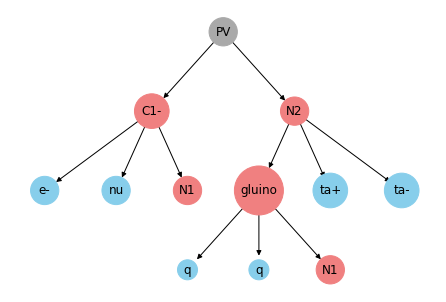

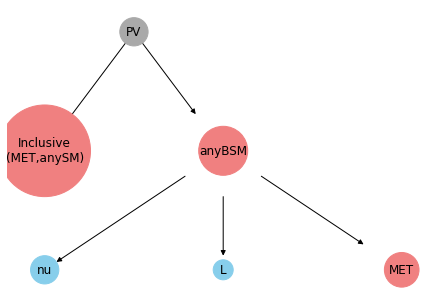

In [4]:
elA.draw()
elB.draw()

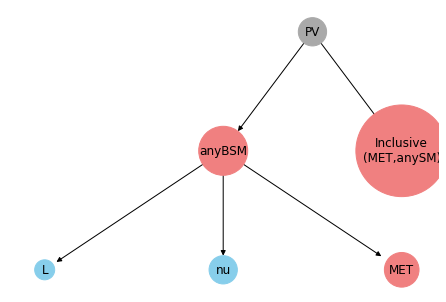

[PV, anyBSM, Inclusive, L, nu, MET]
[0, 1, 2, 4, 5, 6]
[(PV, anyBSM), (PV, Inclusive), (anyBSM, L), (anyBSM, nu), (anyBSM, MET)]


In [5]:
matched = elA.matchesTo(elB)
matched.draw()
print(matched.nodes)
print(matched.nodeIndices)
print(matched.edges)

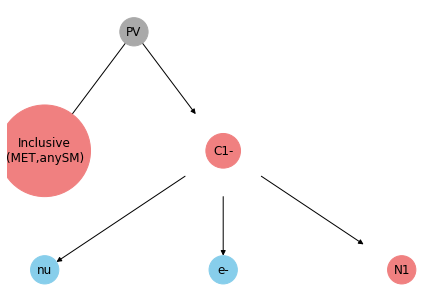

[PV, Inclusive, C1-, nu, e-, N1]
[0, 1, 2, 3, 4, 5]
[(PV, Inclusive), (PV, C1-), (C1-, nu), (C1-, e-), (C1-, N1)]


In [6]:
matched = elB.matchesTo(elA)
matched.draw()
print(matched.nodes)
print(matched.nodeIndices)
print(matched.edges)

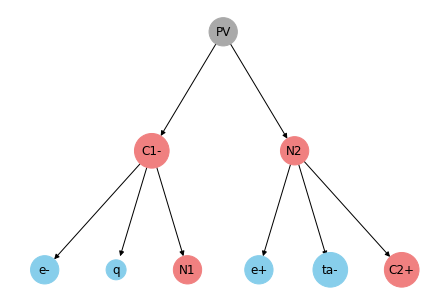

In [7]:
elC = ExpSMS.from_string("[ [ ['e-','q'] ], [['e+','ta-']] ]",model=model,
              intermediateState=[['C1-'],['N2','gluino']], finalState=['N1','C2+'])
elC.draw()

In [8]:
matched = elB.matchesTo(elC)
print(matched)
matched = elC.matchesTo(elB)
print(matched)
matched = elC.matchesTo(elA)
print(matched)
matched = elA.matchesTo(elC)
print(matched)

None
None
None
None


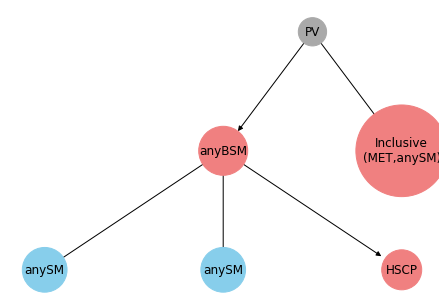

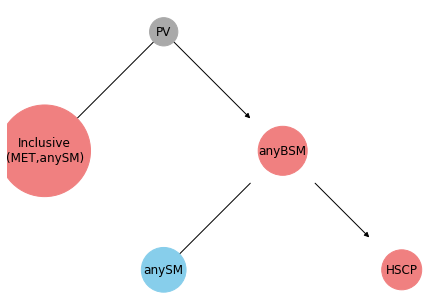

In [9]:
elA = ExpSMS.from_string("[ [ ['*','*'] ], ['*'] ]",model=finalStates, 
              finalState=['HSCP','MET'])
elB = ExpSMS.from_string("[ ['*'], [ ['*'] ] ]",model=finalStates,
              finalState=['MET','HSCP'])
elA.draw()
elB.draw()

In [10]:
matched = elA.matchesTo(elB)
print(matched)
matched = elB.matchesTo(elA)
print(matched)

None
None


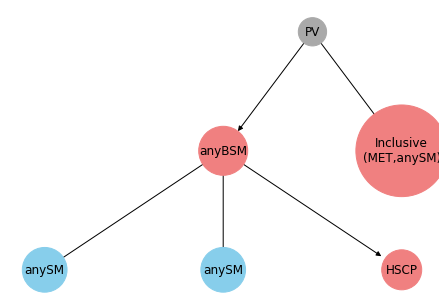

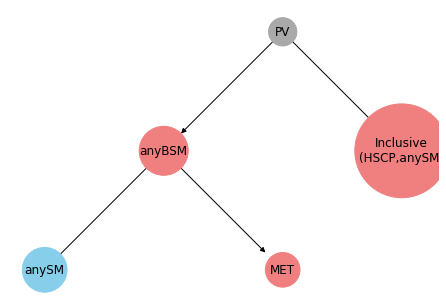

In [11]:
elA = ExpSMS.from_string("[ [ ['*','*'] ], ['*'] ]",model=finalStates, 
              finalState=['HSCP','MET'])
elB = ExpSMS.from_string("[ [ ['*'] ], ['*'] ]",model=finalStates,
              finalState=['MET','HSCP'])
elA.draw()
elB.draw()

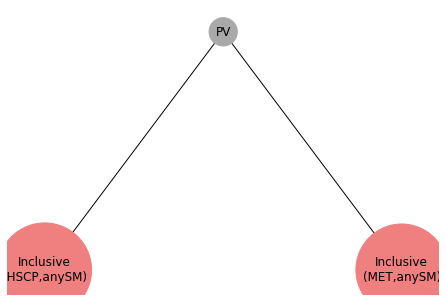

[PV, Inclusive, Inclusive]
[0, 1, 2]
[0, 1, 2, 3, 4, 5]
[(PV, Inclusive), (PV, Inclusive)]


In [12]:
matched = elA.matchesTo(elB)
matched.draw()
print(matched.nodes)
print(matched.nodeIndices)
print(elA.nodeIndices)
print(matched.edges)

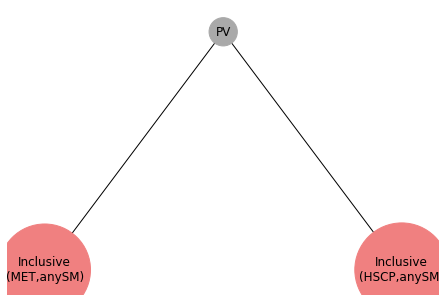

[PV, Inclusive, Inclusive]
[0, 1, 2]
[0, 1, 2, 3, 4]
[(PV, Inclusive), (PV, Inclusive)]


In [13]:
matched = elB.matchesTo(elA)
matched.draw()
print(matched.nodes)
print(matched.nodeIndices)
print(elB.nodeIndices)
print(matched.edges)